## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../Resources/mouse_metadata.csv"
study_results_path = "../Resources/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
#GoodReadsSummary
mouse_count = len(combined_study_df["Mouse ID"].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#check for duplicates that have the same Mouse ID and Timepoint
#ReadingWritingCSV

#checks for rows value counts based on mouse id
combined_study_df["Mouse ID"].value_counts()

g989    13
g570    10
y163    10
i334    10
g316    10
        ..
x226     1
x336     1
l872     1
h428     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#checking extra data values from sample mouse (portland_crimedata)
row_info = combined_study_df.loc[combined_study_df["Mouse ID"] == "g989"]
row_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse = combined_study_df.loc[(combined_study_df["Mouse ID"] != "g989")]
cleaned_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_check = cleaned_mouse["Mouse ID"].value_counts()
print(clean_check)

a818    10
i901    10
e476    10
y163    10
i334    10
        ..
n482     1
t573     1
h428     1
v199     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
means = cleaned_mouse.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians =cleaned_mouse.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance =cleaned_mouse.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std =cleaned_mouse.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem =cleaned_mouse.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

In [8]:
summary_df = pd.DataFrame({"Mean": means,
                        "Median": medians,
                         "Variance": variance,
                          "STD DEV": std,
                          "SEM" : sem})
summary_df.head(10)

,Mean,Median,Variance,STD DEV,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df.agg

<bound method DataFrame.aggregate of                    Mean     Median   Variance   STD DEV       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398>

## Bar and Pie Charts

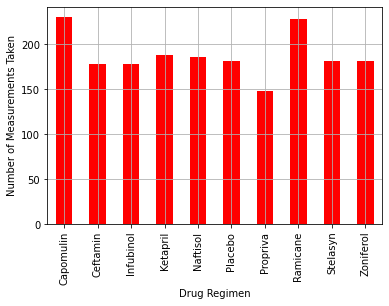

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#group data by drug regimin 
grouped_mouse = cleaned_mouse.groupby(['Drug Regimen']).count()['Tumor Volume (mm3)']
grouped_mouse

grouped_mouse.plot(kind="bar", facecolor="red")
plt.ylabel("Number of Measurements Taken")
plt.grid(axis='both')
plt.show()

Text(0, 0.5, 'Number of Measurements Taken')

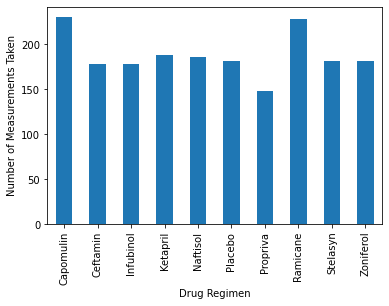

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

pyplot_chart = grouped_mouse.plot(kind='bar')
pyplot_chart.set_ylabel("Number of Measurements Taken")

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#bike_trippin
#groupby gender
gender_mouse = cleaned_mouse.groupby(['Sex']).count()["Mouse ID"]
gender_mouse


Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

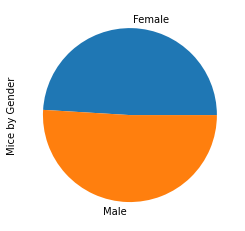

In [14]:
gender_plot = gender_mouse.plot(kind="pie")
gender_plot.set_ylabel("Mice by Gender")
plt.show()

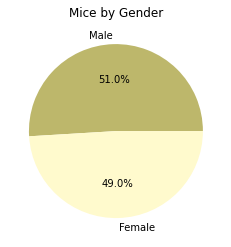

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female"]
gender_count = [958, 922]
colors = ["darkkhaki", "lemonchiffon"]
plt.title("Mice by Gender")
plt.pie(gender_count, labels=gender, colors=colors, autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_mouse = cleaned_mouse.groupby(["Mouse ID"])
tp_mouse = pd.DataFrame(grouped_mouse["Timepoint"].max())
tp_mouse.head(10)


,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
a401,45
a411,45
a444,45
a457,10


In [17]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_df = pd.merge(tp_mouse, cleaned_mouse, on=["Timepoint", "Mouse ID"], how="left")
merge_df

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a262,Placebo,Female,17,29,70.717621,4
3,45,a275,Ceftamin,Female,20,28,62.999356,3
4,30,a366,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,10,z435,Propriva,Female,12,26,48.710661,0
244,45,z578,Ramicane,Male,11,16,30.638696,0
245,45,z581,Infubinol,Female,24,25,62.754451,3
246,45,z795,Naftisol,Female,13,29,65.741070,3


In [18]:
columns = ["Mouse ID", "Drug Regimen", "Timepoint",  "Weight (g)", "Tumor Volume (mm3)"]
capomulin_df = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin", columns]
capomulin_df

,Mouse ID,Drug Regimen,Timepoint,Weight (g),Tumor Volume (mm3)
19,b128,Capomulin,45,22,38.982878
24,b742,Capomulin,45,21,38.939633
61,f966,Capomulin,20,17,30.485985
64,g288,Capomulin,45,19,37.074024
66,g316,Capomulin,45,22,40.159220
80,i557,Capomulin,45,24,47.685963
83,i738,Capomulin,45,20,37.311846
85,j119,Capomulin,45,23,38.125164
87,j246,Capomulin,35,21,38.753265
108,l509,Capomulin,45,21,41.483008


In [19]:
quartiles = capomulin_df["Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(quartiles)

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol =[]

for drug in drug_regimens:
    final_tumor_vol = merge_df.loc[merge_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    tumor_vol.append(final_tumor_vol)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug_regimens}'s potential outliers: {outliers}")

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']'s potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [21]:
capomulin_df.dtypes

Mouse ID               object
Drug Regimen           object
Timepoint               int64
Weight (g)              int64
Tumor Volume (mm3)    float64
dtype: object

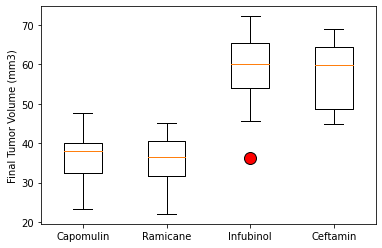

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol, labels = drug_regimens,flierprops=drug_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
m601_mouse = combined_study_df.loc[combined_study_df["Mouse ID"] == "m601"]
m601_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1
35,m601,Capomulin,Male,22,17,25,33.118756,1
36,m601,Capomulin,Male,22,17,30,31.758275,1
37,m601,Capomulin,Male,22,17,35,30.834357,1
38,m601,Capomulin,Male,22,17,40,31.378045,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


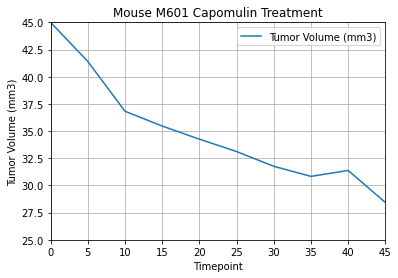

In [24]:
m601_mouse.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)')

plt.title("Mouse M601 Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.xlim(0,45)
plt.ylim(25, 45)

plt.grid()
plt.show()

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
columns = ["Mouse ID", "Drug Regimen", "Timepoint",  "Weight (g)", "Tumor Volume (mm3)"]
capomulin_df = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin", columns]
capomulin_df

,Mouse ID,Drug Regimen,Timepoint,Weight (g),Tumor Volume (mm3)
19,b128,Capomulin,45,22,38.982878
24,b742,Capomulin,45,21,38.939633
61,f966,Capomulin,20,17,30.485985
64,g288,Capomulin,45,19,37.074024
66,g316,Capomulin,45,22,40.159220
80,i557,Capomulin,45,24,47.685963
83,i738,Capomulin,45,20,37.311846
85,j119,Capomulin,45,23,38.125164
87,j246,Capomulin,35,21,38.753265
108,l509,Capomulin,45,21,41.483008


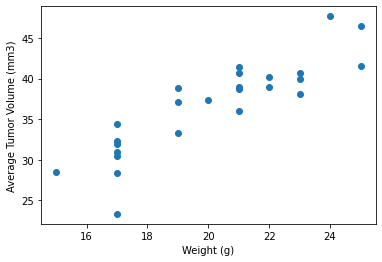

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_average = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


In [27]:
capomulin_average

,Timepoint,Weight (g),Tumor Volume (mm3)
Mouse ID,,,
b128,45,22,38.982878
b742,45,21,38.939633
f966,20,17,30.485985
g288,45,19,37.074024
g316,45,22,40.159220
i557,45,24,47.685963
i738,45,20,37.311846
j119,45,23,38.125164
j246,35,21,38.753265


## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = capomulin_average.iloc[:,1]
ave_tumor = capomulin_average.iloc[:,2]
correlation = st.pearsonr(mouse_weight,ave_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.88


In [29]:
# Perform a linear regression on mouse_weight vs ave_tumor
at_slope, at_int, at_r, at_p, at_std_err = st.linregress(mouse_weight,ave_tumor)

In [30]:
# Create equation of line 
at_fit = at_slope * mouse_weight + at_int

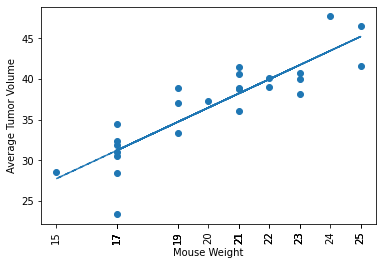

In [31]:
# Plot the linear model on top of scatter plot 
mouse_weight = capomulin_average.iloc[:,1]
ave_tumor = capomulin_average.iloc[:,2]
plt.scatter(mouse_weight,ave_tumor)
plt.plot(mouse_weight,at_fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

<h2>Timepoint Charts</h2>

In [32]:
#mouse id's with 10 timepoints
mouse_count = cleaned_mouse.groupby(["Mouse ID"]).count()
ten_count = mouse_count.loc[(mouse_count["Timepoint"]== 10)]
ten_count.reset_index(inplace=True)
mouse_list = ten_count["Mouse ID"].to_list()
mouse_df = pd.DataFrame({"Mouse ID": mouse_list})
mouse_df

,Mouse ID
0,a203
1,a251
2,a262
3,a275
4,a401
...,...
125,y865
126,z578
127,z581
128,z795


<h5> Of the 249 mice used to conduct the study, measurements at each of the 10 recorded timepoints were attained for 130. </h5>

In [33]:
#dataframe of ten timepoints for each mouse ID
merge_tp_df = pd.merge(mouse_df, cleaned_mouse, on=["Mouse ID"], how="left")
merge_tp_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1295,z969,Naftisol,Male,9,30,25,63.145652,2
1296,z969,Naftisol,Male,9,30,30,65.841013,3
1297,z969,Naftisol,Male,9,30,35,69.176246,4
1298,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
#mean to attain average tumor volume at each timepoint for each drug regimen
two_groups = merge_tp_df.groupby(['Drug Regimen', 'Timepoint'])
two_groups_df = two_groups.mean()
two_groups_df.reset_index(inplace=True)
two_groups_df

,Drug Regimen,Timepoint,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,12.809524,19.857143,45.000000,0.000000
1,Capomulin,5,12.809524,19.857143,44.638812,0.190476
2,Capomulin,10,12.809524,19.857143,43.288693,0.380952
3,Capomulin,15,12.809524,19.857143,42.241369,0.428571
4,Capomulin,20,12.809524,19.857143,41.046149,0.714286
...,...,...,...,...,...,...
95,Zoniferol,25,13.071429,27.571429,55.315109,1.785714
96,Zoniferol,30,13.071429,27.571429,57.520661,2.000000
97,Zoniferol,35,13.071429,27.571429,60.089372,2.285714
98,Zoniferol,40,13.071429,27.571429,62.916692,2.785714


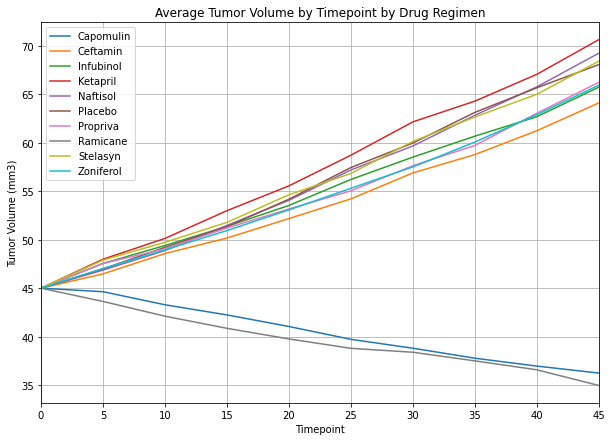

In [35]:
#sorting dataframe for each drug regimen to attain plot points
capomulin = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Capomulin"]
ceftamin = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Ceftamin"]
infubinol = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Infubinol"]
ketapril = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Ketapril"]
naftisol = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Naftisol"]
placebo = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Placebo"]
propriva = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Propriva"]
ramicane = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Ramicane"]
stelasyn = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Stelasyn"]
zoniferol = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Zoniferol"]

# Setting plot points(x,y) and label for each Drug Regimen
plt.figure(figsize=(10,7))
capomulin_x = capomulin["Timepoint"]
capomulin_y = capomulin["Tumor Volume (mm3)"]
plt.plot(capomulin_x, capomulin_y, label = "Capomulin")

ceftamin_x = ceftamin["Timepoint"]
ceftamin_y = ceftamin["Tumor Volume (mm3)"]
plt.plot(ceftamin_x, ceftamin_y, label = "Ceftamin")

infubinol_x = infubinol["Timepoint"]
infubinol_y = infubinol["Tumor Volume (mm3)"]
plt.plot(infubinol_x, infubinol_y, label = "Infubinol")

ketapril_x = ketapril["Timepoint"]
ketapril_y = ketapril["Tumor Volume (mm3)"]
plt.plot(ketapril_x, ketapril_y, label = "Ketapril")

naftisol_x = naftisol["Timepoint"]
naftisol_y = naftisol["Tumor Volume (mm3)"]
plt.plot(naftisol_x, naftisol_y, label = "Naftisol")

placebo_x = placebo["Timepoint"]
placebo_y = placebo["Tumor Volume (mm3)"]
plt.plot(placebo_x, placebo_y, label = "Placebo")

propriva_x = propriva["Timepoint"]
propriva_y = propriva["Tumor Volume (mm3)"]
plt.plot(propriva_x, propriva_y, label = "Propriva")

ramicane_x = ramicane["Timepoint"]
ramicane_y= ramicane["Tumor Volume (mm3)"]
plt.plot(ramicane_x, ramicane_y, label = "Ramicane")

stelasyn_x = stelasyn["Timepoint"]
stelasyn_y= stelasyn["Tumor Volume (mm3)"]
plt.plot(stelasyn_x, stelasyn_y, label = "Stelasyn")

zoniferol_x = zoniferol["Timepoint"]
zoniferol_y = zoniferol["Tumor Volume (mm3)"]
plt.plot(zoniferol_x, zoniferol_y, label = "Zoniferol")

#Plot Labels
plt.xlabel('Timepoint')
# Set the y axis label of the current axis.
plt.ylabel('Tumor Volume (mm3)')
# Set a title of the current axes.
plt.title('Average Tumor Volume by Timepoint by Drug Regimen')
# show a legend on the plot
plt.legend()
plt.xlim(0,45)
# Display a figure.
plt.grid()

<h5>Prescribed drug regimen on mouse tumor volume has shown effectiveness in treatments of Capomulin and Ramicane, as displayed here with an overall consecutive decrease in tumor size at each measured timepoint.</h5>